In [178]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler

## Clustering (K-Means)

In [179]:
country_codes = ['IDN','GUM','PYF']
ind1=["EN.POP.DNST"]
ind1m=["Population density"]
ind2=["NY.GDP.MKTP.CD"]
ind2m=["GDP"]

In [180]:
my_data1  = wb.data.DataFrame(ind1, country_codes, mrv=30).T
my_data1=my_data1.fillna(my_data1.median())
my_data1.head()

economy,GUM,IDN,PYF
YR1991,247.320370,101.896088,55.660109
YR1992,253.135185,103.633746,56.622404
YR1993,258.912963,105.351261,57.553005
YR1994,264.455556,107.043867,58.523497
YR1995,269.553704,108.709162,59.580328


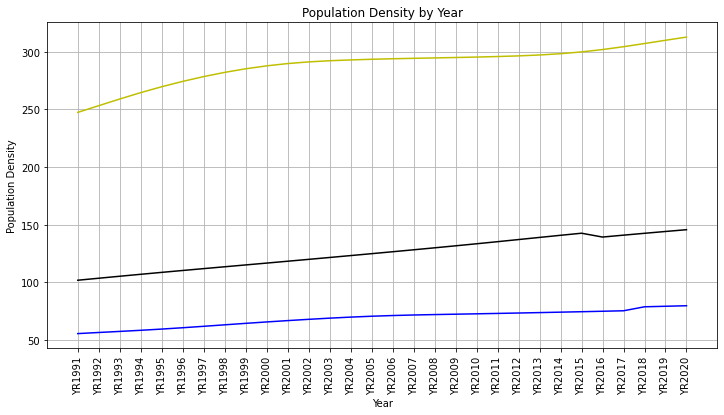

In [181]:
plt.figure(figsize=(12,6))
plt.title('Population Density by Year')
plt.plot(my_data1['GUM'],"y")
plt.plot(my_data1['IDN'],"k")
plt.plot(my_data1['PYF'],"b")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Population Density")
plt.grid()
plt.show()

In [182]:
my_data2  = wb.data.DataFrame(ind2, country_codes, mrv=30).T
my_data2=my_data2.fillna(my_data2.mean())
my_data2.head()

economy,GUM,IDN,PYF
YR1991,5.018632e+09,1.166220e+11,3.267368e+09
YR1992,5.018632e+09,1.280270e+11,3.558215e+09
YR1993,5.018632e+09,1.580067e+11,3.694600e+09
YR1994,5.018632e+09,1.768921e+11,3.522272e+09
YR1995,5.018632e+09,2.021320e+11,3.982377e+09


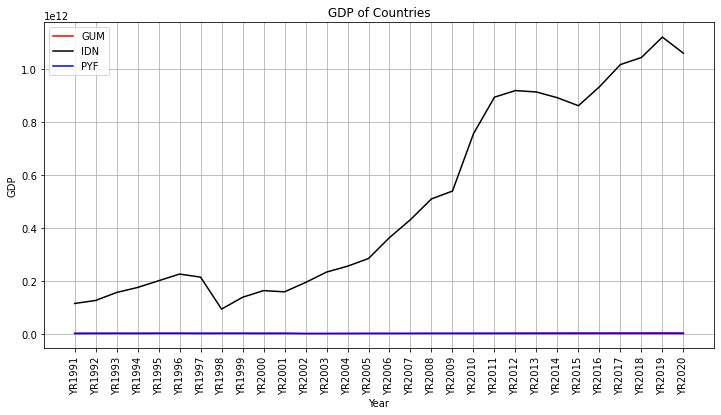

In [183]:
plt.figure(figsize=(12,6))
plt.title('GDP of Countries')
plt.plot(my_data2['GUM'],"r",label="GUM")
plt.plot(my_data2['IDN'],"k",label="IDN")
plt.plot(my_data2['PYF'],"b",label="PYF")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("GDP")
plt.legend()
plt.grid()
plt.show()

In [184]:
def norm(data):
    minmax=MinMaxScaler()
    norml=minmax.fit_transform(data)
    return norml
norml=norm(my_data1.values)

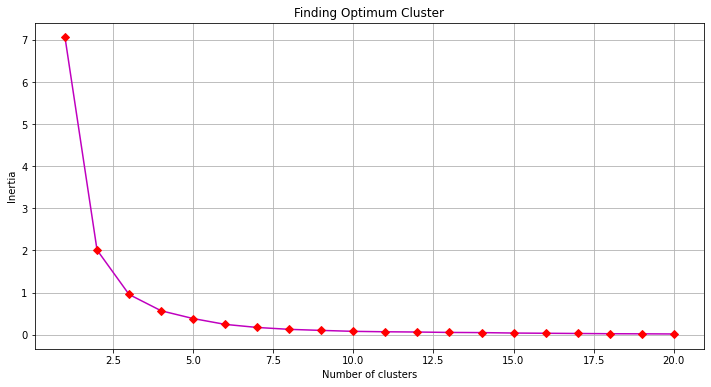

In [185]:
elb = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  random_state=0)
    kmeans.fit(norml)
    elb.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.title('Finding Optimum Cluster')
plt.plot(range(1, 21), elb,"m-")
plt.plot(range(1, 21), elb,"Dr")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [186]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit(norml)
pred_y

KMeans(n_clusters=3, random_state=0)

In [187]:
kmeans.cluster_centers_

array([[0.6565711 , 0.43277793, 0.5165339 ],
       [0.81562698, 0.83992609, 0.80195419],
       [0.25107254, 0.11637434, 0.12452746]])

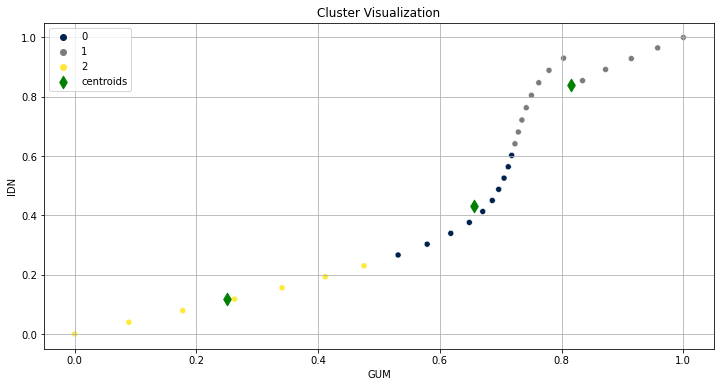

In [188]:
df=pd.DataFrame(norml,columns=my_data1.columns)
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization')
sns.scatterplot(data=df, x="GUM", y="IDN", hue=kmeans.labels_,palette="cividis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="d", c="g", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

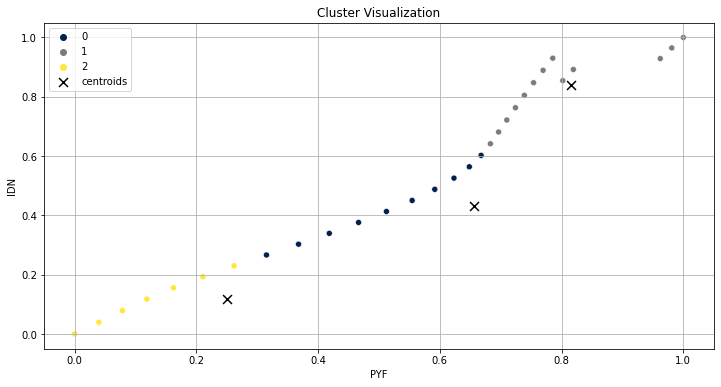

In [189]:
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization')
sns.scatterplot(data=df, x="PYF", y="IDN", hue=kmeans.labels_,palette="cividis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="k", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

## Curve Fitting

In [190]:
from scipy.optimize import curve_fit

In [195]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [196]:
y = func(my_data2.values[:,1], 1.5, 0.9, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=my_data2.values[:,1].size)
ydata = y + y_noise

In [197]:
popt, pcov = curve_fit(func, my_data2.values[:,1], ydata)

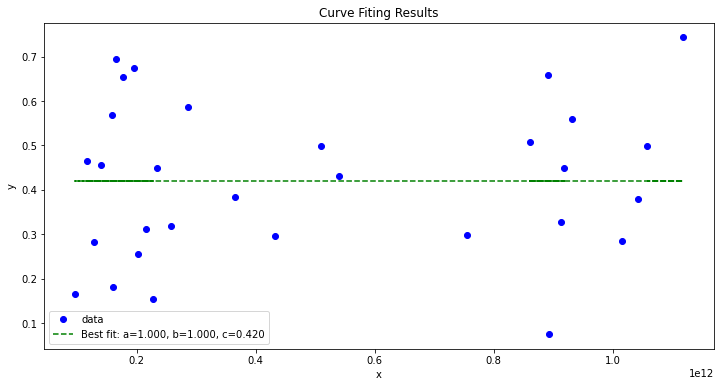

In [198]:
plt.figure(figsize=(12,6))
plt.title('Curve Fiting Results')
plt.plot(my_data2.values[:,1], ydata, 'bo', label='data')
plt.plot(my_data2.values[:,1], func(my_data2.values[:,0], *popt), 'g--',label='Best fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

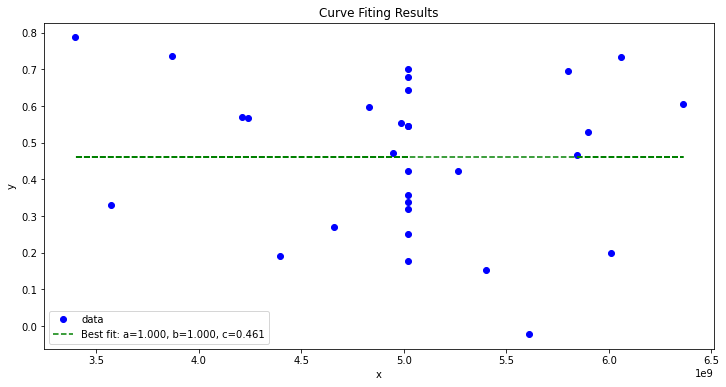

In [199]:
y0 = func(my_data2.values[:,0], 1.5, 0.9, 0.5)
rng0 = np.random.default_rng()
y0_noise = 0.2 * rng0.normal(size=my_data2.values[:,0].size)
y0data = y0 + y0_noise
popt0, pcov0 = curve_fit(func, my_data2.values[:,0], y0data)
plt.figure(figsize=(12,6))
plt.title('Curve Fiting Results')
plt.plot(my_data2.values[:,0], y0data, 'bo', label='data')
plt.plot(my_data2.values[:,0], func(my_data2.values[:,0], *popt0), 'g--',label='Best fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt0))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()